In [1]:
import pandas as pd

In [2]:
# Load the Excel files
reference = pd.read_excel("./raw_data/Beispielobjekte.xlsx", sheet_name="Anlagen")


In [3]:
reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gebäude-ID                7021 non-null   int64  
 1   Anlagentyp                7021 non-null   object 
 2   Anlagen-ID                7021 non-null   int64  
 3   Bauteil der Anlage        1815 non-null   float64
 4   Anlagenname               7021 non-null   object 
 5   Untergewerk-ID            7021 non-null   int64  
 6   Untergewerk               7021 non-null   int64  
 7   AKS-Bezeichnung           7021 non-null   object 
 8   Kostengruppe              7021 non-null   int64  
 9   Kostengruppenbezeichnung  7021 non-null   object 
 10  Anzahl                    3054 non-null   float64
 11  Hinweis Preisermittlung   850 non-null    object 
 12  Merkmale                  6464 non-null   object 
 13  Verbandsnummer            5515 non-null   object 
dtypes: float

In [4]:
reference.head()

,Gebäude-ID,Anlagentyp,Anlagen-ID,Bauteil der Anlage,Anlagenname,Untergewerk-ID,Untergewerk,AKS-Bezeichnung,Kostengruppe,Kostengruppenbezeichnung,Anzahl,Hinweis Preisermittlung,Merkmale,Verbandsnummer
0,2026,Anlage,71610,NaN,Kleinkaltwassersatz 109 kW,1246,434,Kompressionskältemaschine,430,Lufttechnische Anlagen,1.0,NaN,Kälteleistung:109 kW; Kältemittel:R410A; Kälte...,434.01.02.000.01.01
1,2026,Anlage,71611,NaN,Kleinkaltwassersatz 237kW,1246,434,Kompressionskältemaschine,430,Lufttechnische Anlagen,1.0,NaN,Kälteleistung:237 kW; Kältemittel:R410A; Kälte...,434.01.02.000.01.01
2,2026,Anlage,71612,NaN,Kältenetz Dach - Deckenkühlung & Fancoil,1250,434,Verteilnetz / Pumpen - Kälteerzeugung,430,Lufttechnische Anlagen,1.0,NaN,Anzahl Heizkreise:5 Stk.; Heizkreis (Art):dyna...,434.03.01.000.01.02
3,2026,Bauteil,71624,71612.0,Ausdehnungsgefäß Dach,1526,434,Verteilnetz / Pumpen - Kälteerzeugung,430,Lufttechnische Anlagen,1.0,NaN,"max. zulässiger Betriebsdruck:; Volumen:0,05 m3;",NaN
4,2026,Bauteil,71613,71612.0,Ausdehnungsgefäß Kälteverteiler 1. OG,1526,434,Verteilnetz / Pumpen - Kälteerzeugung,430,Lufttechnische Anlagen,1.0,NaN,max. zulässiger Betriebsdruck:10 bar; Volumen:...,NaN


## Look for dominant columns that can be used for broader categorization:

columns that can be used for such a thing are potentially:

- Anlagenname
- Untergewerk-ID
- Untergewerk
- AKS-Bezeichnung
- Kostengruppenbezeichnung

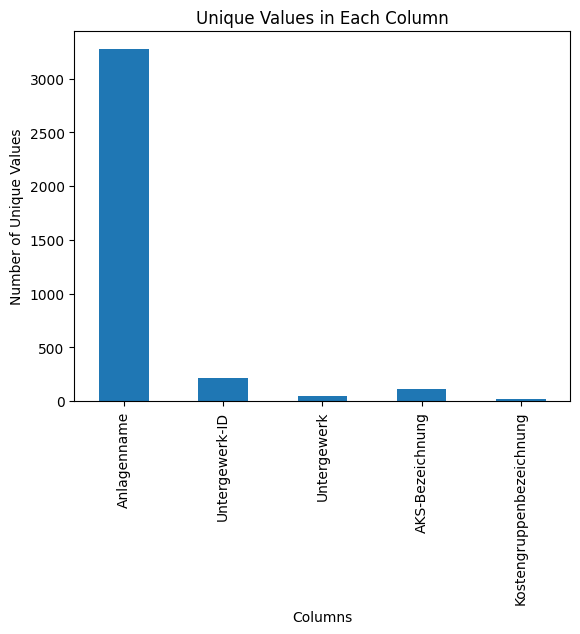

In [5]:
import matplotlib.pyplot as plt
# Plot the number of unique values for columns Anlagenname, Untergewerk-ID, Untergewerk, AKS-Bezeichnung, Kostengruppenbezeichnung
categorizers = reference[['Anlagenname', 'Untergewerk-ID', 'Untergewerk', 'AKS-Bezeichnung', 'Kostengruppenbezeichnung']]
categorizers.nunique().plot(kind='bar')
plt.title("Unique Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.show()


# clean the Reference (Beispielobjekte)

In [6]:
# see how many unique ids are in the reference
unique_buildings_ref = reference['Gebäude-ID'].unique()
print(f"Unique buildings in Reference:")
print("   list:", unique_buildings_ref)
print("   count:", len(unique_buildings_ref))

Unique buildings in Reference:
   list: [2026 2021  543 2035 2022 2040 2030 2023 2024 2025  544 2095 2017 2104
  545 2027 2037 2038 2031 2032 2033 2036 2020 2039  546 2034 2041 2028
 2029 2042 2096 2043]
   count: 32


### organize Beispielobjekte by Gebäude-ID -> each Gebäude has its dataframe -> csv

In [7]:
for geb_id in unique_buildings_ref:
    df = reference[reference['Gebäude-ID'] == geb_id]
    df.to_csv(f"./reference_data/csvs/Beispielobjekte_{geb_id}.csv", index=False)
    
print(f"Successfully saved.")


Successfully saved.


## Observation
when observing each csv, you will notice that there's two types of Anlagen:
- Anlage
- Bauteil

Anlage(system) is a group of Bauteil(subsystems)

### iterate through each Gebäude and create a Dict.

This NESTED dict should contain Categories as keys. Values are dicts where there's all the necessary info about that category (sub-category, ids and corresponding Bauteile)

In [8]:
# iterate through each csv
## First make sure that the length of the dataframe is equal to the number of unique 'Anlagen-ID's
import glob
geb_ref_csvs = glob.glob("./reference_data/csvs/*.csv")
for geb_csv in geb_ref_csvs:
    df = pd.read_csv(geb_csv)
    unique_anlagen_ids = df['Anlagen-ID'].unique()
    print(f"File: {geb_csv}")
    if len(unique_anlagen_ids) != len(df):
        print(f"   Number of unique Anlagen-IDs: {len(unique_anlagen_ids)}")
        print(f"   Number of rows in the dataframe: {len(df)}")
        print("   Warning: The number of unique Anlagen-IDs does not match the number of rows in the dataframe.")
    else:
        print("   OK")
    print("------------")

File: ./reference_data/csvs/Beispielobjekte_2104.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2039.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2038.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2017.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2028.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2029.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2024.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2030.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2031.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2025.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_543.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2033.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2027.csv
   OK
------------
File: ./reference_data/csvs/Beispielobjekte_2026.csv
   OK
------

### Condition Respected
## Now start with the the creation of list of dicts

In [9]:
# iterate through each Gebäude and create a list of dicts for each Gebäude, and save it as JSON
import json
for geb_id in geb_ref_csvs:
    df = pd.read_csv(geb_id)
    anlagen_geb = {}
    filter_for_anlagen = df[df['Anlagentyp'] == 'Anlage']
    filter_for_bauteile = df[df['Anlagentyp'] == 'Bauteil']
    categories = filter_for_anlagen['Kostengruppenbezeichnung'].unique()
    for category in categories:
        category_df = filter_for_anlagen[filter_for_anlagen['Kostengruppenbezeichnung'] == category]
        anlagen_geb[category] = {'id': int(category_df['Kostengruppe'].unique()[0]), 'subcategories': []}
        subcategories_id = category_df['Untergewerk'].unique()
        for id in subcategories_id:
            subcategory_id_df = category_df[category_df['Untergewerk'] == id]
            anlagen_geb[category]['subcategories'].append({
                int(id): []}
                )
            for subcategory in subcategory_id_df['AKS-Bezeichnung'].unique():
                subcategory_df = subcategory_id_df[subcategory_id_df['AKS-Bezeichnung'] == subcategory]
                anlagen_geb[category]['subcategories'][-1][int(id)].append({
                    subcategory: list(subcategory_df['Anlagenname'].unique())}
                )

    # save the anlagen_geb dict as JSON
    geb_name = geb_id.split("/")[-1].replace(".csv", "")
    with open(f"./reference_data/jsons/{geb_name}.json", "w") as json_file:
        json.dump(anlagen_geb, json_file, indent=4, ensure_ascii=False)
    print(f"Successfully saved {geb_name}.json")

    


    

Successfully saved Beispielobjekte_2104.json
Successfully saved Beispielobjekte_2039.json
Successfully saved Beispielobjekte_2038.json
Successfully saved Beispielobjekte_2017.json
Successfully saved Beispielobjekte_2028.json
Successfully saved Beispielobjekte_2029.json
Successfully saved Beispielobjekte_2024.json
Successfully saved Beispielobjekte_2030.json
Successfully saved Beispielobjekte_2031.json
Successfully saved Beispielobjekte_2025.json
Successfully saved Beispielobjekte_543.json
Successfully saved Beispielobjekte_2033.json
Successfully saved Beispielobjekte_2027.json
Successfully saved Beispielobjekte_2026.json
Successfully saved Beispielobjekte_2032.json
Successfully saved Beispielobjekte_2036.json
Successfully saved Beispielobjekte_2022.json
Successfully saved Beispielobjekte_544.json
Successfully saved Beispielobjekte_545.json
Successfully saved Beispielobjekte_2023.json
Successfully saved Beispielobjekte_2037.json
Successfully saved Beispielobjekte_2021.json
Successfully 

### Create general Hierarchy of reference data

In [10]:
anlagen_geb = {}
df = reference.copy()
filter_for_anlagen = df[df['Anlagentyp'] == 'Anlage']
filter_for_bauteile = df[df['Anlagentyp'] == 'Bauteil']
categories = filter_for_anlagen['Kostengruppenbezeichnung'].unique()
for category in categories:
    category_df = filter_for_anlagen[filter_for_anlagen['Kostengruppenbezeichnung'] == category]
    anlagen_geb[category] = {'id': int(category_df['Kostengruppe'].unique()[0]), 'subcategories': []}
    subcategories_id = category_df['Untergewerk'].unique()
    for id in subcategories_id:
        subcategory_id_df = category_df[category_df['Untergewerk'] == id]
        anlagen_geb[category]['subcategories'].append({
            int(id): []}
            )
        for subcategory in subcategory_id_df['AKS-Bezeichnung'].unique():
            subcategory_df = subcategory_id_df[subcategory_id_df['AKS-Bezeichnung'] == subcategory]
            anlagen_geb[category]['subcategories'][-1][int(id)].append({
                subcategory: list(subcategory_df['Anlagenname'].unique())}
            )

# save the anlagen_geb dict as JSON
with open(f"./reference_data/structure.json", "w") as json_file:
    json.dump(anlagen_geb, json_file, indent=4, ensure_ascii=False)
print(f"Successfully saved structure.json")

Successfully saved structure.json
